<a href="https://colab.research.google.com/github/MatrosovaRaisa5/work/blob/main/work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
import numpy as np
import pandas as pd

In [72]:
import pandas as pd

def preprocess_data(raw_df):
    df = raw_df[
        raw_df['Календарь Месяц'].notna() &
        raw_df['Календарь Год'].notna() &
        raw_df['Значения'].notna()
    ].copy()

    df.loc[:, 'Составная_Метрика'] = (
        df['Подпоказатели'].astype(str) + '_' +
        df['Показатели'].astype(str) + '_' +
        df['Метрики'].astype(str)
    )

    df.loc[:, 'БУ-месяц-год'] = (
        df['БУ'].astype(str) + '_' +
        df['Календарь Месяц'].astype(str) + '_' +
        df['Календарь Год'].astype(str)
    )

    # Преобразование в широкий формат
    pivot_df = df.pivot_table(
        index='БУ-месяц-год',
        columns='Составная_Метрика',
        values='Значения',
        aggfunc='first'
    )

    return pivot_df

def convert_time_to_hours(time_str):
    if isinstance(time_str, str) and len(time_str.split(':')) == 3:
        try:
            hours, minutes, seconds = map(int, time_str.split(':'))
            if 0 <= hours < 24 and 0 <= minutes < 60 and 0 <= seconds < 60:
                res = hours + minutes/60 + seconds/3600
                return round(res, 2)
        except ValueError:
            pass
    return time_str

def convert_comma_to_float(value):
    if isinstance(value, str):
        try:
            cleaned = value.replace(' ', '').replace(',', '.')
            return float(cleaned)
        except (ValueError, TypeError):
            return value
    return value

raw_df = pd.read_csv(r'drive/MyDrive/ПАВУК все.csv', sep=',', encoding='utf-8')

processed_df = preprocess_data(raw_df)

for col in processed_df.columns:
    processed_df[col] = processed_df[col].apply(convert_time_to_hours)
    processed_df[col] = processed_df[col].apply(convert_comma_to_float)

processed_df = processed_df.apply(pd.to_numeric, errors='coerce')

processed_df = processed_df.dropna(how='all')

processed_df

Составная_Метрика,"NONAME_Эффективность_Доля, %","SLA_Результативность_SLA, %","SLA_Результативность_Динамика SLA, %",nan_Совершенствование_Кол-во зарегистрированных,nan_Совершенствование_Кол-во инциденты,"Автомаршрутизация_Совершенствование_Динамика, %","Автомаршрутизация_Совершенствование_Доля, %",Астрономическое время выполнения_Производительность_Ср время,"Возвраты_Результативность_Динамика, %","Возвраты_Результативность_Доля, %",...,"Оценка_Результативность_Динамика Оценки, %","Оценка_Результативность_Доля оцененных, %","Оценка_Результативность_Доля оценок 2/3, %","Переназначенные_Качество_Динамика, %","Переназначенные_Качество_Доля, %",Просрочено сверх SLA_Производительность_Ср время,"Средневзвешенная ставка_Эффективность_Отклонение, %","ТРЗ_Эффективность_Отношение, %","ШЗНО_Совершенствование_Динамика, %","ШЗНО_Совершенствование_Доля, %"
БУ-месяц-год,,,,,,,,,,,,,,,,,,,,,
APP.1C-2IS@GPN-AZIA_авг_2024.0,0.0,100.0,0.0,3.0,1.0,0.0,0.0,21.80,0.0,0.0,...,NaN,0.0,NaN,0.00,0.00,0.0,NaN,NaN,0.0,0.0
APP.1C-2IS@GPN-AZIA_апр_2024.0,0.0,100.0,0.0,9.0,1.0,0.0,0.0,0.96,0.0,0.0,...,NaN,0.0,NaN,11.11,11.11,0.0,NaN,NaN,0.0,0.0
APP.1C-2IS@GPN-AZIA_дек_2024.0,0.0,100.0,0.0,5.0,0.0,-50.0,0.0,0.03,0.0,0.0,...,NaN,0.0,NaN,0.00,0.00,0.0,NaN,NaN,0.0,0.0
APP.1C-2IS@GPN-AZIA_июл_2024.0,0.0,100.0,0.0,2.0,0.0,0.0,0.0,1.15,0.0,0.0,...,NaN,0.0,NaN,0.00,0.00,0.0,NaN,NaN,0.0,0.0
APP.1C-2IS@GPN-AZIA_июн_2024.0,0.0,100.0,0.0,3.0,0.0,0.0,0.0,6.17,0.0,0.0,...,NaN,0.0,NaN,0.00,0.00,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ОTHER.STUDIO-ITSK@ITSK_сен_2024.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ОTHER.STUDIO-ITSK@ITSK_фев_2024.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,100.0
ОTHER.STUDIO-ITSK@ITSK_фев_2025.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74235 entries, APP.1C-2IS@GPN-AZIA_авг_2024.0 to ОTHER.STUDIO-ITSK@ITSK_янв_2025.0
Data columns (total 37 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   NONAME_Эффективность_Доля, %                                  28608 non-null  float64
 1   SLA_Результативность_SLA, %                                   22390 non-null  float64
 2   SLA_Результативность_Динамика SLA, %                          16784 non-null  float64
 3   nan_Совершенствование_Кол-во зарегистрированных               20865 non-null  float64
 4   nan_Совершенствование_Кол-во инциденты                        20865 non-null  float64
 5   Автомаршрутизация_Совершенствование_Динамика, %               14760 non-null  float64
 6   Автомаршрутизация_Совершенствование_Доля, %                   19901 non-null  float64
 7   Астрономическое

In [74]:
# Определяем столбцы с наименьшим количеством пропусков
missing_counts = processed_df.isna().sum()
top_columns = missing_counts.nsmallest(17).index.tolist()

print(top_columns)

# Фильтруем строки, где в этих столбцах нет пропусков
filtered_df = processed_df.dropna(subset=top_columns)

# Создаем новый датсает
final_df = filtered_df[top_columns].copy()

print(f"Размер итогового датасета: {final_df.shape}")
processed_df= final_df
processed_df

['Доступность_Результативность_Доступность, %', 'КИ_Качество_Кол-во КИ', 'NONAME_Эффективность_Доля, %', 'SLA_Результативность_SLA, %', 'nan_Совершенствование_Кол-во зарегистрированных', 'nan_Совершенствование_Кол-во инциденты', 'Инциденты_Совершенствование_Доля, %', 'Ожидание_Совершенствование_Доля, %', 'Переназначенные_Качество_Доля, %', 'Астрономическое время выполнения_Производительность_Ср время', 'Возвраты_Результативность_Доля, %', 'Отклонённые_Качество_Доля, %', 'Оценка_Результативность_Доля оцененных, %', 'Просрочено сверх SLA_Производительность_Ср время', 'Автомаршрутизация_Совершенствование_Доля, %', 'ШЗНО_Совершенствование_Доля, %', 'Время ЗНО_Производительность_Доля 2H, %']
Размер итогового датасета: (17812, 17)


Составная_Метрика,"Доступность_Результативность_Доступность, %",КИ_Качество_Кол-во КИ,"NONAME_Эффективность_Доля, %","SLA_Результативность_SLA, %",nan_Совершенствование_Кол-во зарегистрированных,nan_Совершенствование_Кол-во инциденты,"Инциденты_Совершенствование_Доля, %","Ожидание_Совершенствование_Доля, %","Переназначенные_Качество_Доля, %",Астрономическое время выполнения_Производительность_Ср время,"Возвраты_Результативность_Доля, %","Отклонённые_Качество_Доля, %","Оценка_Результативность_Доля оцененных, %",Просрочено сверх SLA_Производительность_Ср время,"Автомаршрутизация_Совершенствование_Доля, %","ШЗНО_Совершенствование_Доля, %","Время ЗНО_Производительность_Доля 2H, %"
БУ-месяц-год,,,,,,,,,,,,,,,,,
APP.1C-2IS@GPN-AZIA_авг_2024.0,100.0,0.0,0.0,100.0,3.0,1.0,33.3,0.0,0.00,21.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APP.1C-2IS@GPN-AZIA_апр_2024.0,100.0,0.0,0.0,100.0,9.0,1.0,11.1,22.2,11.11,0.96,0.0,0.0,0.0,0.0,0.0,0.0,12.5
APP.1C-2IS@GPN-AZIA_дек_2024.0,100.0,0.0,0.0,100.0,5.0,0.0,0.0,20.0,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0,100.0
APP.1C-2IS@GPN-AZIA_июл_2024.0,100.0,0.0,0.0,100.0,2.0,0.0,0.0,50.0,0.00,1.15,0.0,0.0,0.0,0.0,0.0,0.0,100.0
APP.1C-2IS@GPN-AZIA_июн_2024.0,100.0,0.0,0.0,100.0,3.0,0.0,0.0,33.3,0.00,6.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
АЗС.ТВ-МЕДИА_мар_2025.0,100.0,0.0,95.8,100.0,7.0,0.0,0.0,0.0,14.29,8.89,0.0,0.0,0.0,0.0,71.4,0.0,60.0
АЗС.ТВ-МЕДИА_сен_2024.0,100.0,0.0,100.0,100.0,2.0,0.0,0.0,50.0,0.00,7.97,0.0,0.0,0.0,0.0,0.0,0.0,25.0
АЗС.ТВ-МЕДИА_фев_2024.0,100.0,0.0,100.0,100.0,3.0,2.0,66.7,33.3,0.00,4.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, APP.1C-2IS@GPN-AZIA_авг_2024.0 to АЗС.ТВ-МЕДИА_янв_2025.0
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Доступность_Результативность_Доступность, %                   17812 non-null  float64
 1   КИ_Качество_Кол-во КИ                                         17812 non-null  float64
 2   NONAME_Эффективность_Доля, %                                  17812 non-null  float64
 3   SLA_Результативность_SLA, %                                   17812 non-null  float64
 4   nan_Совершенствование_Кол-во зарегистрированных               17812 non-null  float64
 5   nan_Совершенствование_Кол-во инциденты                        17812 non-null  float64
 6   Инциденты_Совершенствование_Доля, %                           17812 non-null  float64
 7   Ожидание_Совершенствовани

In [78]:
processed_df.describe()

Составная_Метрика,"Доступность_Результативность_Доступность, %",КИ_Качество_Кол-во КИ,"NONAME_Эффективность_Доля, %","SLA_Результативность_SLA, %",nan_Совершенствование_Кол-во зарегистрированных,nan_Совершенствование_Кол-во инциденты,"Инциденты_Совершенствование_Доля, %","Ожидание_Совершенствование_Доля, %","Переназначенные_Качество_Доля, %",Астрономическое время выполнения_Производительность_Ср время,"Возвраты_Результативность_Доля, %","Отклонённые_Качество_Доля, %","Оценка_Результативность_Доля оцененных, %",Просрочено сверх SLA_Производительность_Ср время,"Автомаршрутизация_Совершенствование_Доля, %","ШЗНО_Совершенствование_Доля, %","Время ЗНО_Производительность_Доля 2H, %"
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,99.986112,0.102291,9.474573,96.767387,157.796036,14.347968,10.715321,10.575949,5.294793,10.973433,2.003492,3.960880,17.207461,0.824625,22.766719,12.425185,33.642808
std,0.311991,0.674937,22.635279,10.482282,1275.684028,148.148654,17.517208,18.106360,14.295371,7.307875,7.255106,11.424829,21.460265,3.045599,97.464467,24.685733,31.076393
min,71.560000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,0.000000,99.400000,4.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000
50%,100.000000,0.000000,0.000000,100.000000,16.000000,1.000000,1.500000,1.400000,0.000000,10.755000,0.000000,0.000000,11.800000,0.000000,0.700000,0.000000,25.900000
75%,100.000000,0.000000,4.800000,100.000000,66.000000,5.000000,14.300000,14.300000,3.570000,17.330000,1.300000,2.400000,25.000000,0.000000,33.300000,10.125000,50.000000
max,100.000000,32.000000,100.000000,100.000000,40746.000000,5738.000000,99.000000,100.000000,100.000000,24.000000,100.000000,100.000000,100.000000,24.000000,5425.000000,100.000000,100.000000


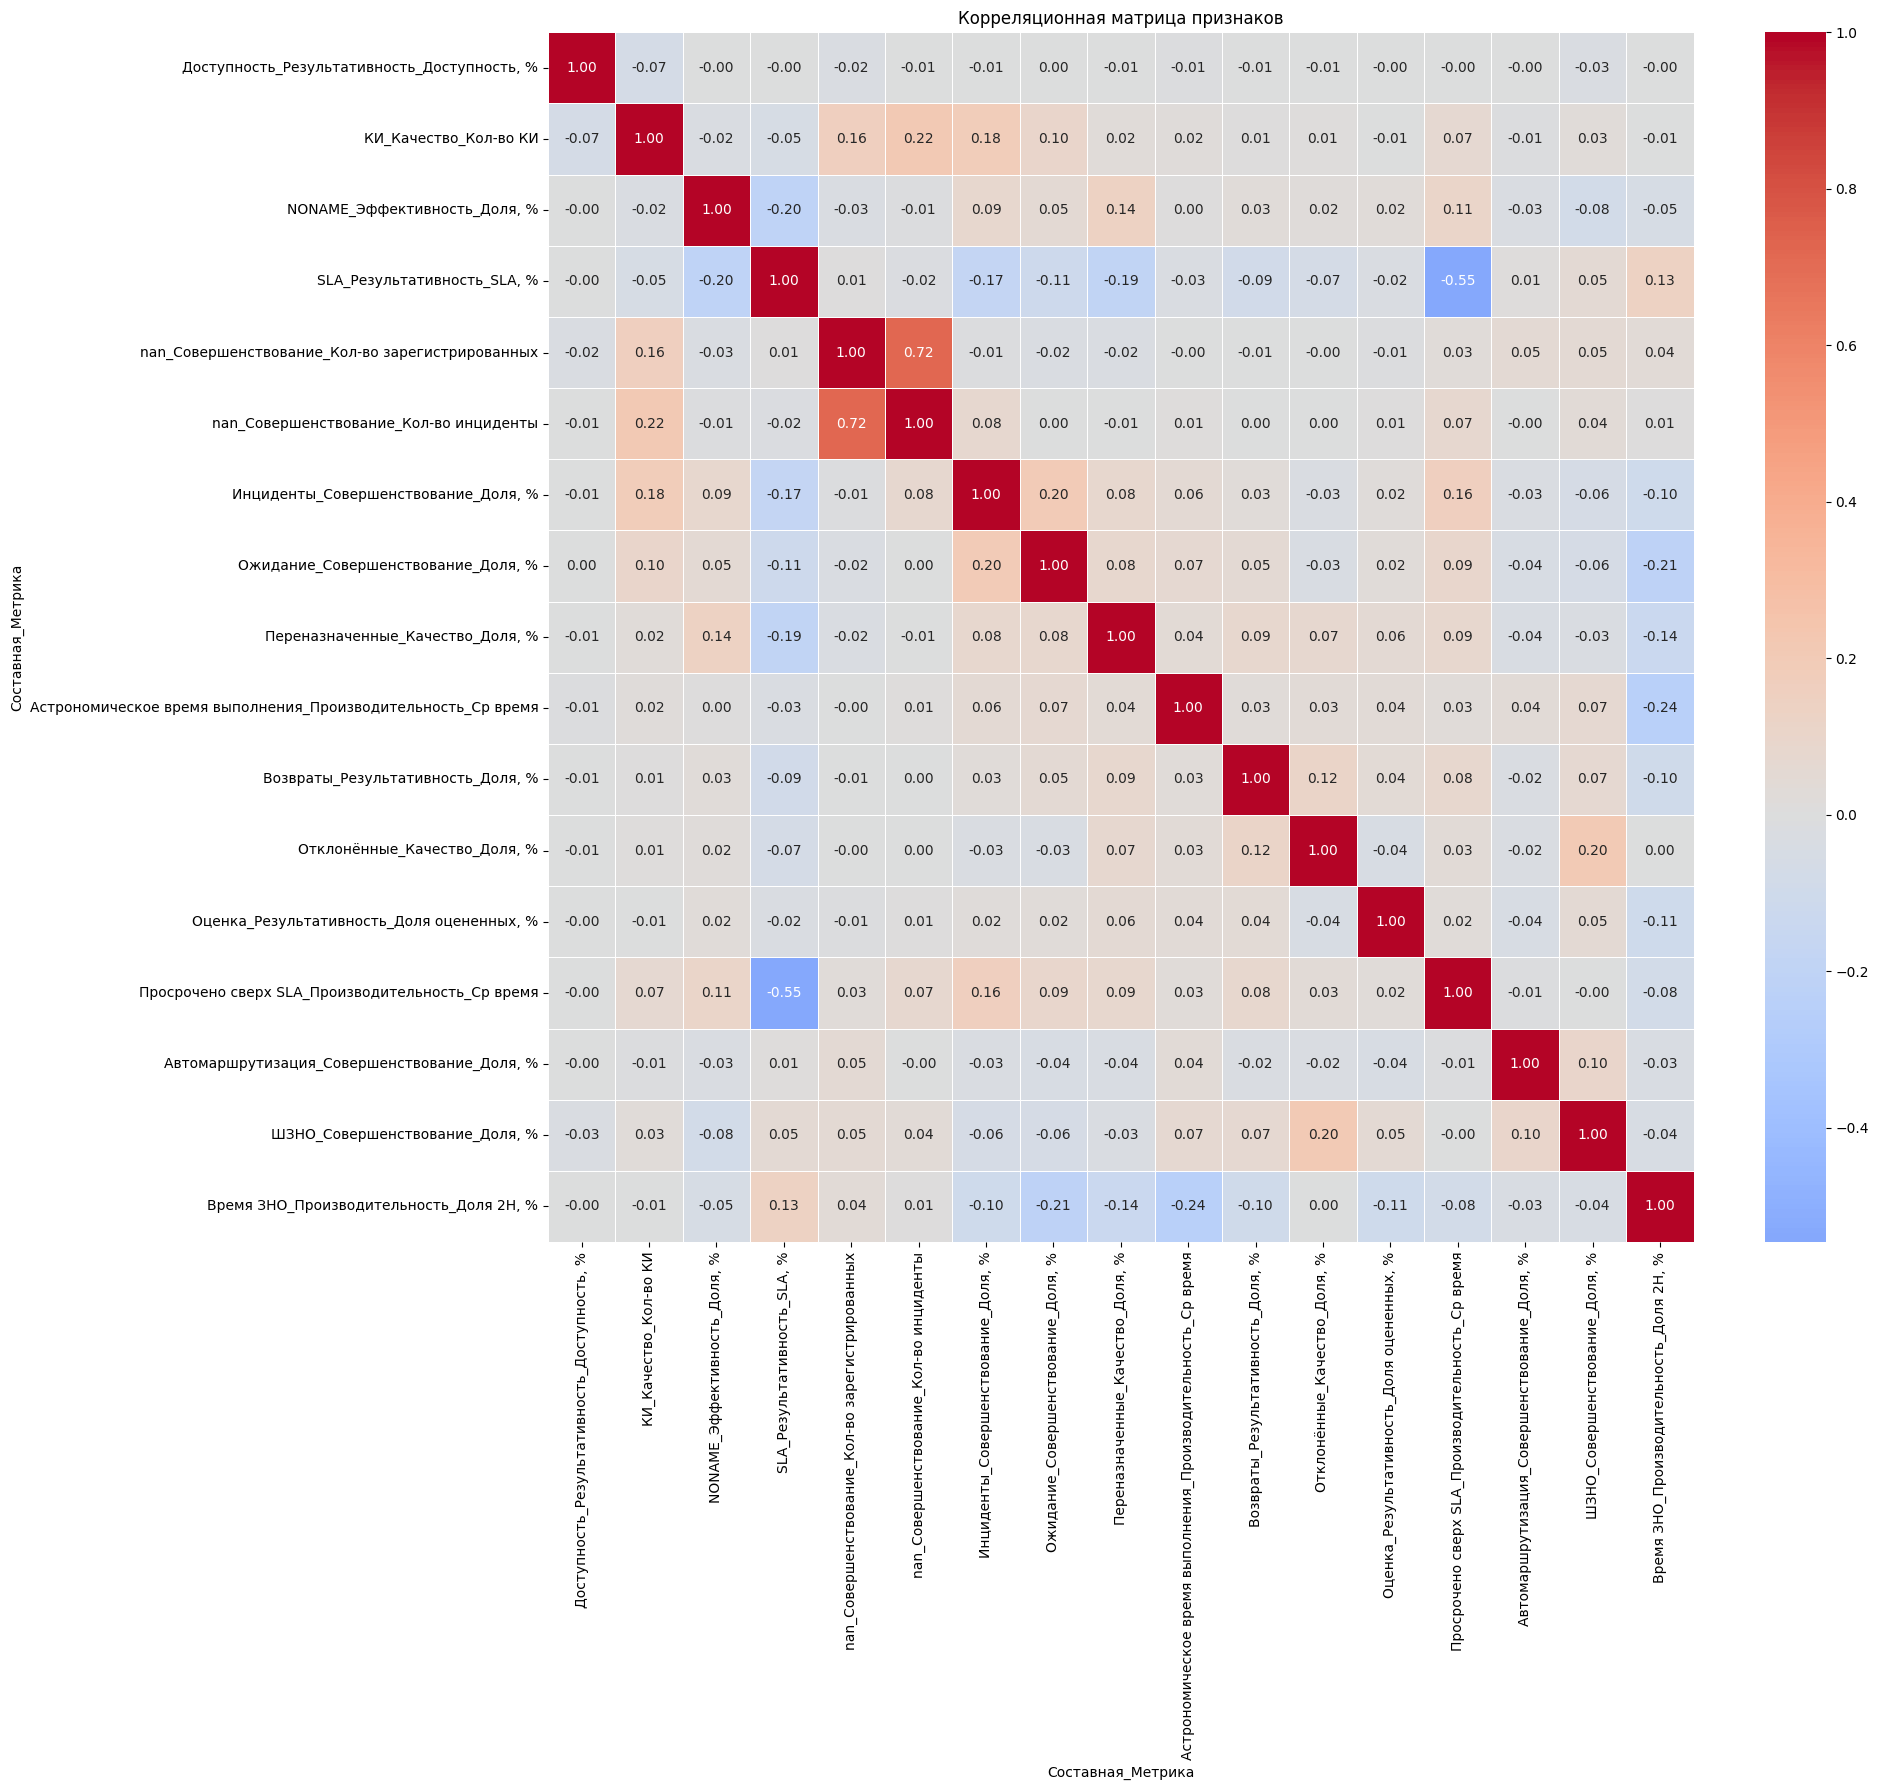

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = processed_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

In [81]:
import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

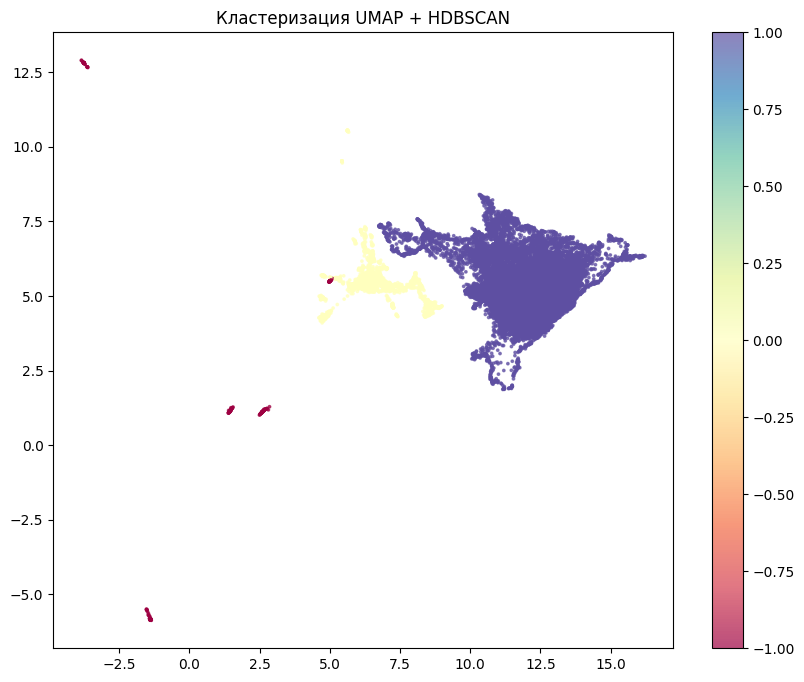

In [83]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_df)

# UMAP
reducer = umap.UMAP(
    n_components=5,
    random_state=42,
    n_neighbors=30,
    min_dist=0.3,
    metric='manhattan',
    spread=1.0
)
umap_result = reducer.fit_transform(scaled_data)

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=150,
    min_samples=40,
    cluster_selection_method='eom',
    cluster_selection_epsilon=0.3,
    alpha=0.9,
    prediction_data=True
)
clusters = clusterer.fit_predict(umap_result)

plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='Spectral', s=3, alpha=0.7)
plt.title('Кластеризация UMAP + HDBSCAN')
plt.colorbar()
plt.show()

processed_df['Cluster_UMAP+HDBSCAN'] = clusters

In [84]:
from sklearn import metrics
from hdbscan.validity import validity_index

# Основные характеристики кластеризации
n_clusters = len(np.unique(clusters)) - (1 if -1 in clusters else 0)
noise_ratio = np.mean(clusters == -1)

print(f"Основные характеристики:")
print(f"Количество кластеров: {n_clusters}")
print(f"Процент шума: {noise_ratio:.2%}")

valid_points = clusters != -1
valid_clusters = clusters[valid_points]
valid_embedding = umap_result[valid_points]

if len(np.unique(valid_clusters)) > 1 and valid_embedding.shape[0] > 0:
    # Расчет силуэта на стратифицированной выборке
    sample_indices = []
    unique_clusters = np.unique(valid_clusters)

    for cluster_id in unique_clusters:
        cluster_indices = np.where(valid_clusters == cluster_id)[0]
        sample_size = min(500, len(cluster_indices))
        sample_indices.extend(
            np.random.choice(cluster_indices, sample_size, replace=False)
        )

    silhouette = metrics.silhouette_score(
        valid_embedding[sample_indices],
        valid_clusters[sample_indices]
    )
    calinski = metrics.calinski_harabasz_score(valid_embedding, valid_clusters)
    davies = metrics.davies_bouldin_score(valid_embedding, valid_clusters)

    print(f"\nSilhouette Score: {silhouette:.4f} (на стратифицированной выборке {len(sample_indices)} точек)")
    print(f"Calinski-Harabasz Index: {calinski:.2f}")
    print(f"Davies-Bouldin Index: {davies:.4f}")

    if hasattr(clusterer, 'relative_validity_'):
        print(f"HDBSCAN Relative Validity: {clusterer.relative_validity_:.4f}")

else:
    print("\nНедостаточно кластеров для расчета метрик качества")

Основные характеристики:
Количество кластеров: 2
Процент шума: 1.41%

Silhouette Score: 0.6734 (на стратифицированной выборке 1000 точек)
Calinski-Harabasz Index: 18519.83
Davies-Bouldin Index: 0.4685


Распределение объектов по кластерам:
Cluster_UMAP+HDBSCAN
-1      252
 0     1687
 1    15873
Name: count, dtype: int64


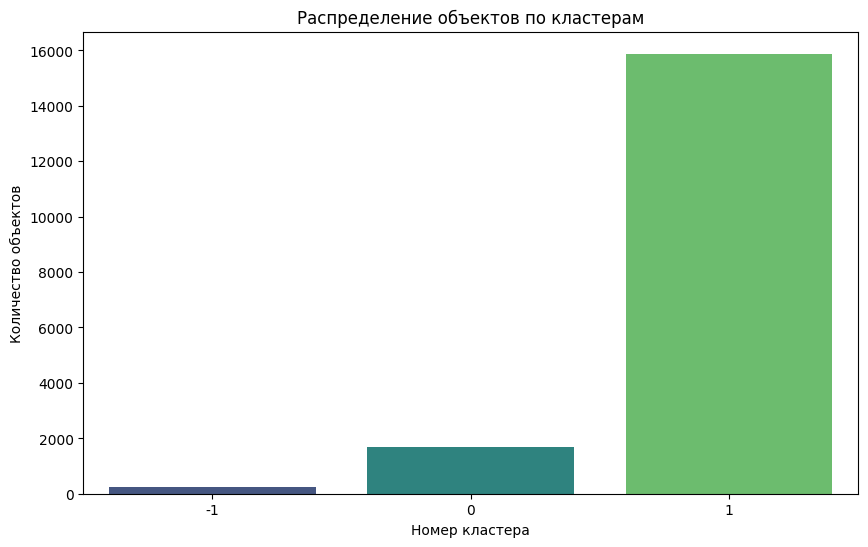

In [85]:
cluster_summary = processed_df['Cluster_UMAP+HDBSCAN'].value_counts().sort_index()
print("Распределение объектов по кластерам:")
print(cluster_summary)

# Визуализация распределения кластеров
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_UMAP+HDBSCAN', data=processed_df, palette='viridis')
plt.title('Распределение объектов по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Количество объектов')
plt.show()

In [86]:
# Признаки с максимальным различием между кластерами
std_per_feature = processed_df.groupby('Cluster_UMAP+HDBSCAN').std().mean()
top_discriminative = std_per_feature.sort_values(ascending=False).head(5).index

print("Наиболее дискриминативные признаки:")
print(top_discriminative)

Наиболее дискриминативные признаки:
Index(['nan_Совершенствование_Кол-во зарегистрированных',
       'nan_Совершенствование_Кол-во инциденты',
       'Автомаршрутизация_Совершенствование_Доля, %',
       'Время ЗНО_Производительность_Доля 2H, %',
       'Оценка_Результативность_Доля оцененных, %'],
      dtype='object', name='Составная_Метрика')


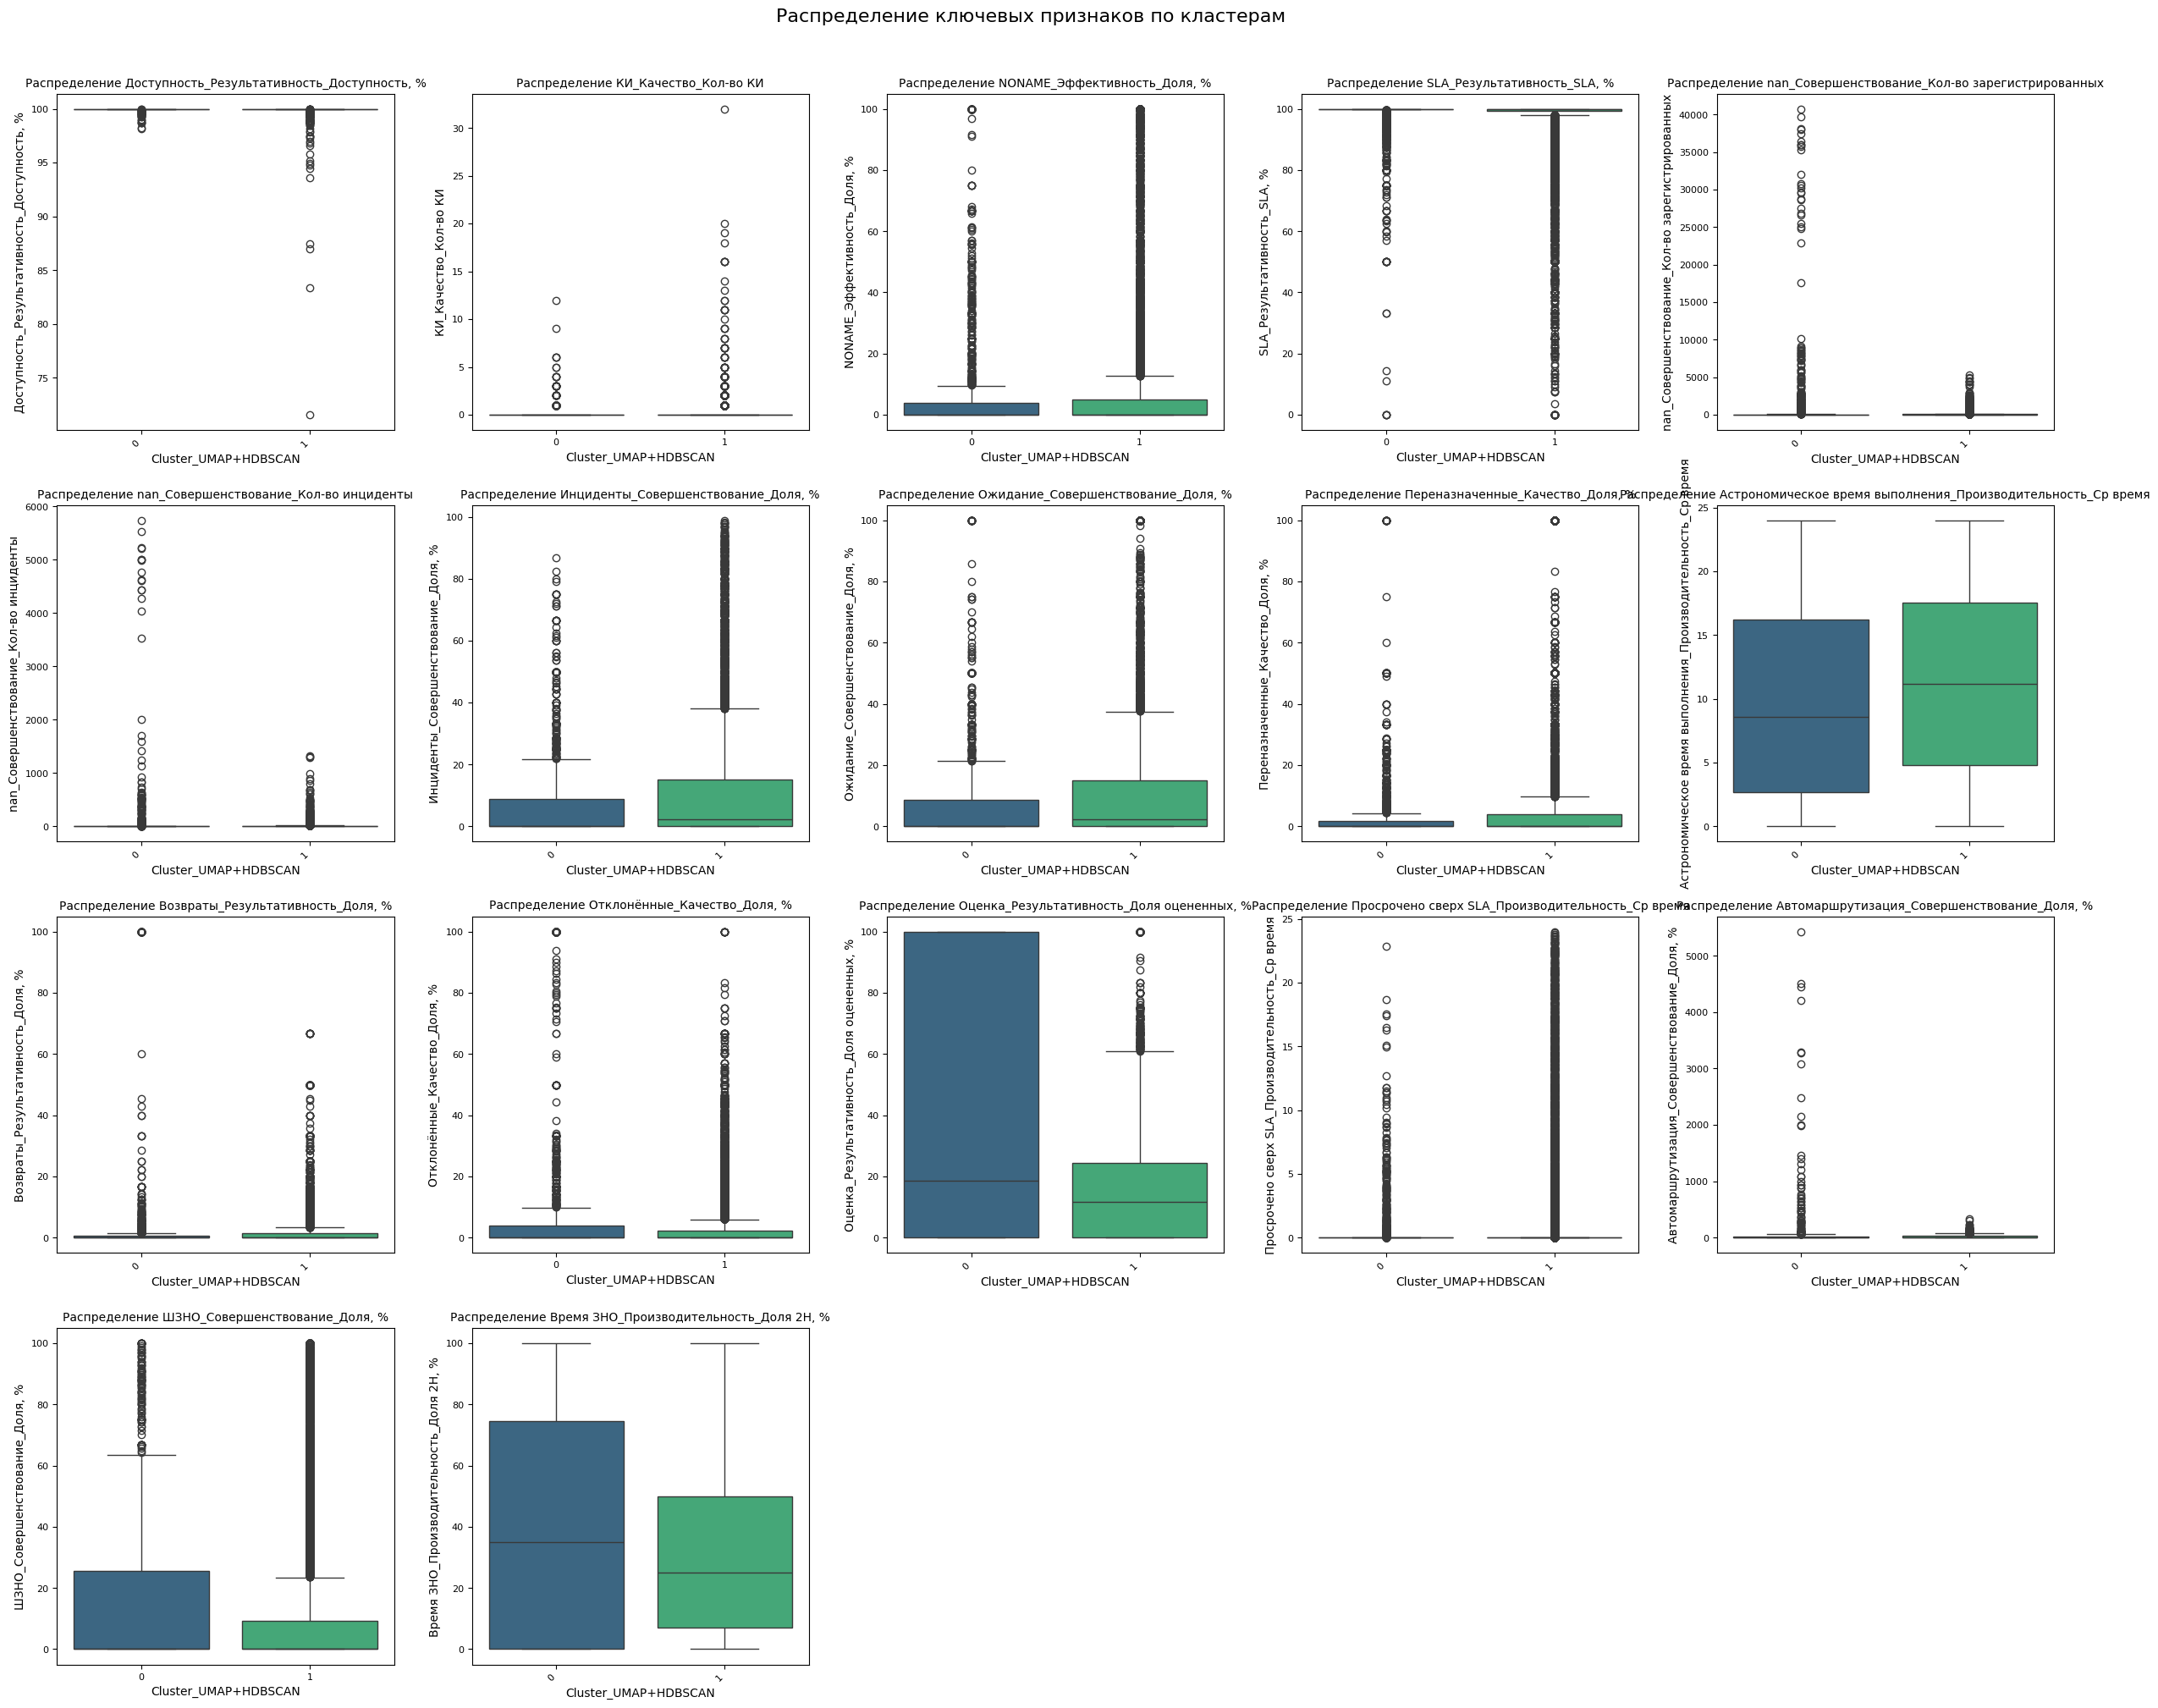

In [96]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['Доступность_Результативность_Доступность, %', 'КИ_Качество_Кол-во КИ',
                'NONAME_Эффективность_Доля, %', 'SLA_Результативность_SLA, %',
                'nan_Совершенствование_Кол-во зарегистрированных',
                'nan_Совершенствование_Кол-во инциденты', 'Инциденты_Совершенствование_Доля, %',
                'Ожидание_Совершенствование_Доля, %', 'Переназначенные_Качество_Доля, %',
                'Астрономическое время выполнения_Производительность_Ср время',
                'Возвраты_Результативность_Доля, %', 'Отклонённые_Качество_Доля, %',
                'Оценка_Результативность_Доля оцененных, %',
                'Просрочено сверх SLA_Производительность_Ср время',
                'Автомаршрутизация_Совершенствование_Доля, %',
                'ШЗНО_Совершенствование_Доля, %', 'Время ЗНО_Производительность_Доля 2H, %']

n_features = len(key_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(25, 5 * n_rows))

for i, feature in enumerate(key_features, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.boxplot(
        x='Cluster_UMAP+HDBSCAN',
        y=feature,
        data=processed_df[processed_df['Cluster_UMAP+HDBSCAN'] != -1],
        palette='viridis'
    )
    plt.title(f'Распределение {feature}', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    if len(feature) > 30:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.suptitle('Распределение ключевых признаков по кластерам', y=1.02, fontsize=16)
plt.show()

<Figure size 1500x1500 with 0 Axes>

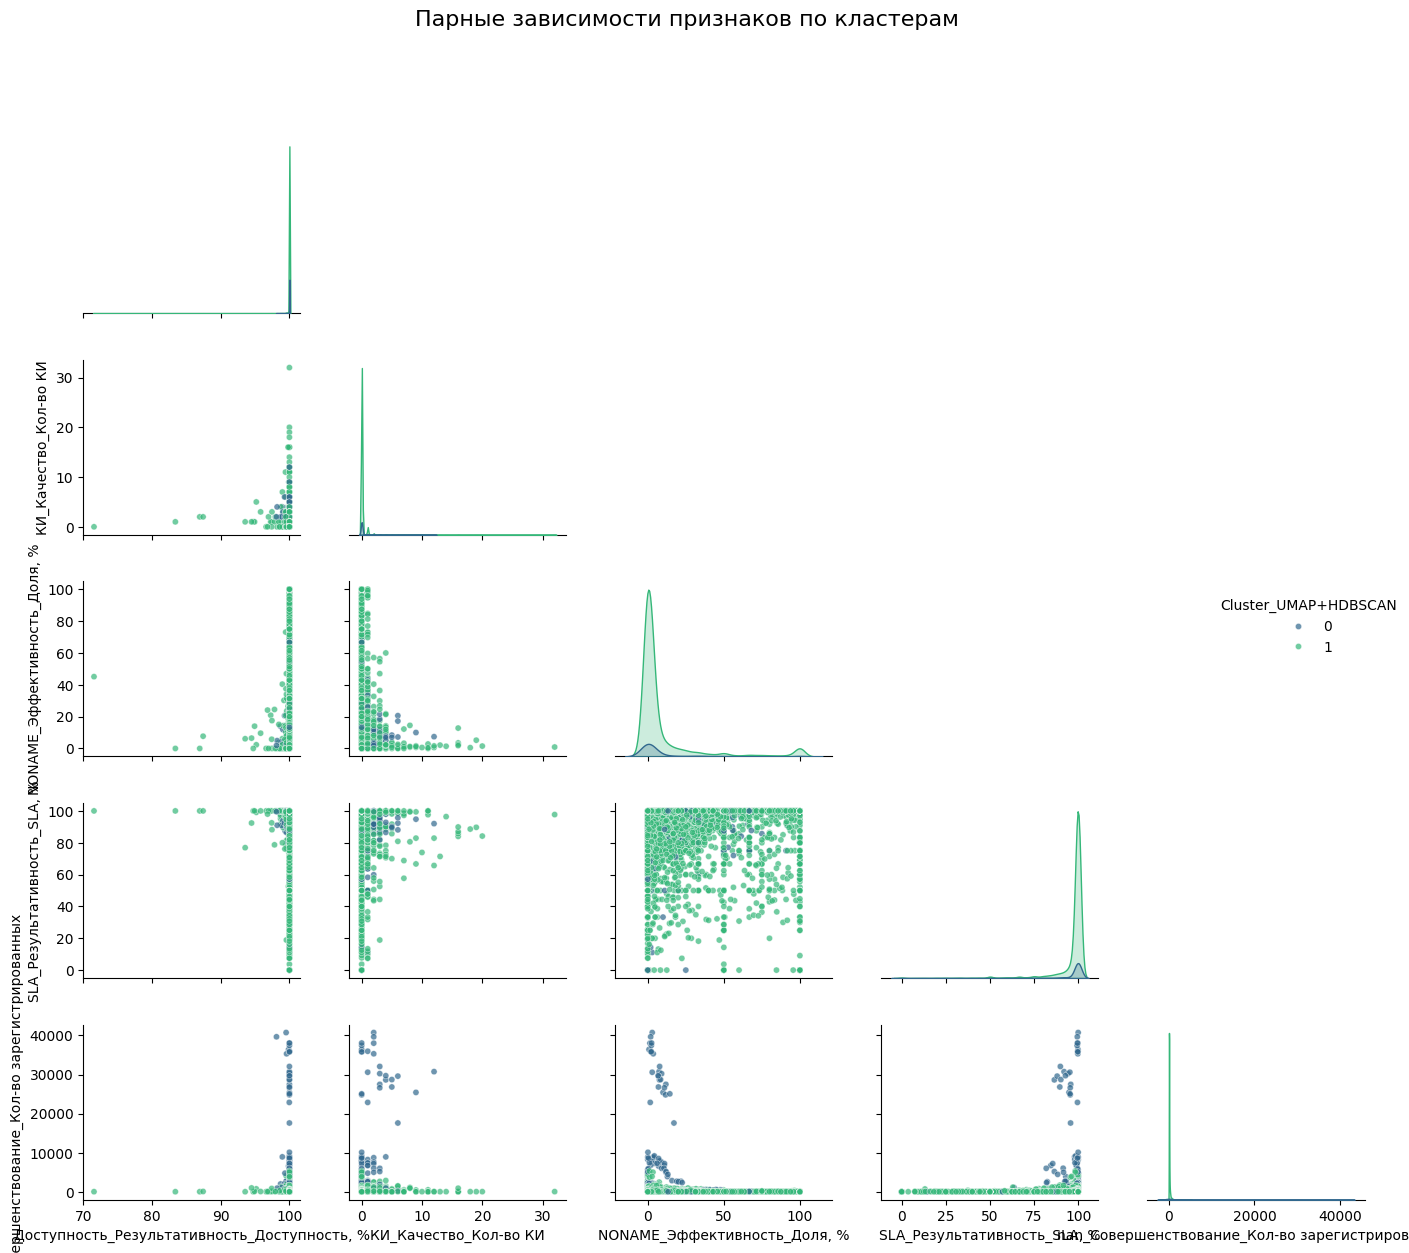

In [97]:
selected_features = key_features[:5]

# Парные зависимости признаков
plt.figure(figsize=(15, 15))
sns.pairplot(
    processed_df[processed_df['Cluster_UMAP+HDBSCAN'] != -1],
    vars=selected_features,
    hue='Cluster_UMAP+HDBSCAN',
    plot_kws={'alpha': 0.7, 's': 20},
    palette='viridis',
    corner=True
)
plt.suptitle('Парные зависимости признаков по кластерам', y=1.02, fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

# K-means

In [93]:
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
tsne_result = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42).fit_transform(scaler.fit_transform(processed_df))
plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=30, alpha=0.5)
plt.show()
k_range = range(1, 11)
wcss, silhouette = [], []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10).fit(tsne_result)
    wcss.append(kmeans.inertia_)

    if k > 1:
        silhouette.append(silhouette_score(tsne_result, kmeans.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(k_range, wcss, 'o-')
ax1.set(title='Метод локтя', xlabel='Число кластеров', ylabel='WCSS')
ax1.grid(alpha=0.3)

ax2.plot(range(2, 11), silhouette, 'o-', color='green')
ax2.axvline(x=np.argmax(silhouette) + 2, color='red', linestyle='--', alpha=0.7)
ax2.set(title='Метод силуэта', xlabel='Число кластеров', ylabel='Силуэтный коэффициент')
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

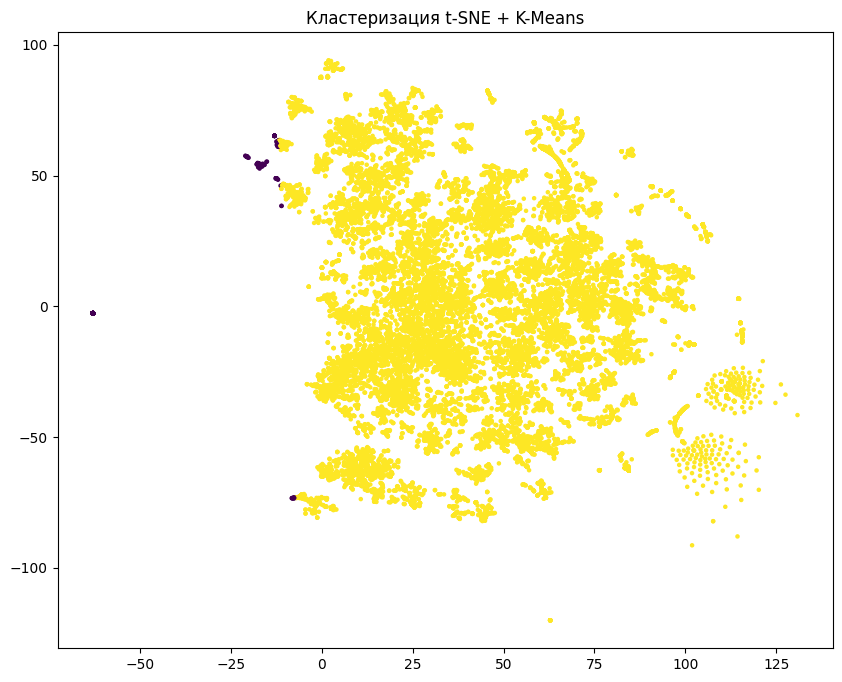

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(tsne_result)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Кластеризация t-SNE + K-Means')
plt.show()

processed_df['Cluster_t-SNE+K-Means'] = clusters

cluster_summary = processed_df['Cluster_t-SNE+K-Means'].value_counts().sort_index()
print("Распределение объектов по кластерам:")
print(cluster_summary)

# Визуализация распределения кластеров
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_t-SNE+K-Means', data=processed_df, palette='viridis')
plt.title('Распределение объектов по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Количество объектов')
plt.show()